In [9]:
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [10]:
# BBAS3.SA

# BBDC4.SA
# ticker = "SPY"
# ticker = "VALE3.SA"
ticker = "BBDC4.SA"
ticker2 = "VALE3.SA"
# ticker2 = "^BVSP"

data = yf.download(ticker, start="2011-01-01", end="2023-10-10")
data2 = yf.download(ticker2,  start="2011-01-01", end="2023-10-10")

# data = yf.download(ticker, start="2010-01-01", end="2022-04-22")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


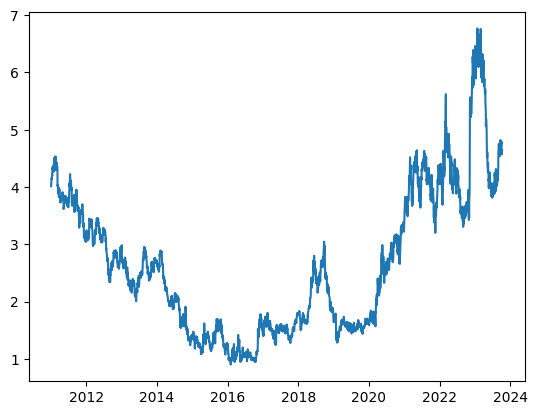

In [11]:
data = data.reindex(data2.index)
data['Adj Close'] = data2['Adj Close'] / data['Adj Close']
plt.plot(data['Adj Close'])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3172 entries, 2011-01-03 to 2023-10-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3172 non-null   float64
 1   High       3172 non-null   float64
 2   Low        3172 non-null   float64
 3   Close      3172 non-null   float64
 4   Adj Close  3172 non-null   float64
 5   Volume     3172 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 173.5 KB
None


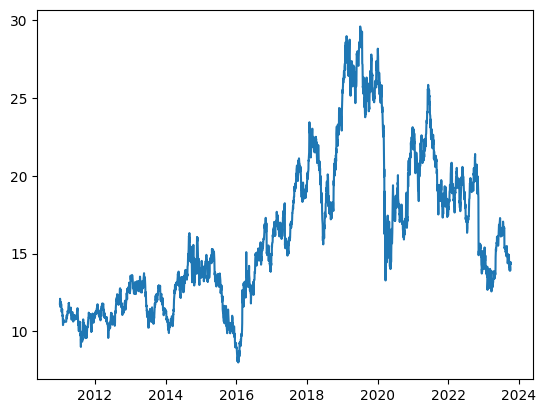

In [12]:
print(data.info())
plt.plot(data['Close'])

                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2011-01-03  11.809763  11.927362  11.724237  11.774127   4.012746  10862336   
2011-01-04  11.866781  11.955871  11.731364  11.877472   4.058434  11080374   
2011-01-05  11.824018  12.112669  11.770564  12.098415   4.056263  14632682   
2011-01-06  12.020016  12.077033  11.734928  11.777691   4.113229  19405387   
2011-01-07  11.745619  11.834709  11.478349  11.578130   4.152624  12611972   

            daily_return state  
Date                            
2011-01-03           NaN  down  
2011-01-04      0.011386    up  
2011-01-05     -0.000535  down  
2011-01-06      0.014044    up  
2011-01-07      0.009577    up  


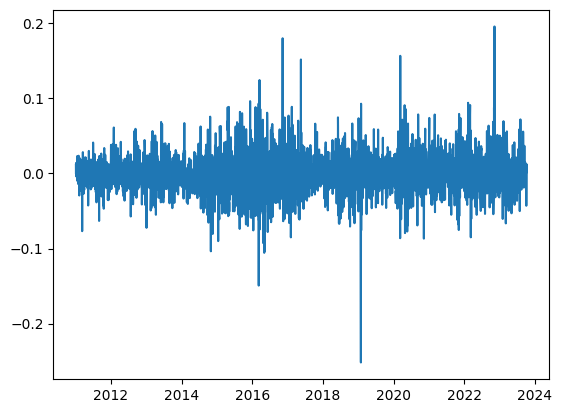

In [13]:
data["daily_return"] = data["Adj Close"].pct_change()
data["state"] = np.where(data["daily_return"] >= 0, "up", "down")
print(data.head(5))
plt.plot(data['daily_return'])

In [14]:
up_counts = len(data[data["state"] == "up"])
down_counts = len(data[data["state"] == "down"])
up_to_up = len(data[(data["state"] == "up") & (data["state"].shift(-1)=="up") ]) / len(data.query('state=="up"'))
down_to_up = len(data[(data["state"] == "up") & (data["state"].shift(-1)=="down") ]) / len(data.query('state=="up"'))
up_to_down = len(data[(data["state"] == "down") & (data["state"].shift(-1)=="up") ]) / len(data.query('state=="down"'))
down_to_down = len(data[(data["state"] == "down") & (data["state"].shift(-1)=="down") ]) / len(data.query('state=="down"'))
transition_matrix = pd.DataFrame({
    "up": [up_to_up, up_to_down],
    "down": [down_to_up, down_to_down]
}, index=["up", "down"])

print(transition_matrix)

            up      down
up    0.504679  0.494697
down  0.506055  0.493945


In [17]:
print('\n',len(data[(data["state"]=="up") & (data["state"].shift(-1)=="down") & (data["state"].shift(-2)=="down")]))
print(round(len(data[(data["state"]=="up") & (data["state"].shift(-1)=="down") & (data["state"].shift(-2)=="down")]) / len(data[(data["state"].shift(1)=="down") & (data["state"].shift(2)=="down")]),2))

print('\n',len(data[(data["state"]=="up") & (data["state"].shift(-1)=="down") & (data["state"].shift(-2)=="down")  & (data["state"].shift(-3)=="down")]))
print(round(len(data[(data["state"]=="up") & (data["state"].shift(-1)=="down") & (data["state"].shift(-2)=="down") & (data["state"].shift(-3)=="down")]) / len(data[(data["state"].shift(1)=="down") & (data["state"].shift(2)=="down") & (data["state"].shift(3)=="down")]),2))

print('\n',len(data[(data["state"]=="up") & (data["state"].shift(-1)=="down") & (data["state"].shift(-2)=="down")  & (data["state"].shift(-3)=="down") & (data["state"].shift(-4)=="down")]))
print(round(len(data[(data["state"]=="up") & (data["state"].shift(-1)=="down") & (data["state"].shift(-2)=="down") & (data["state"].shift(-3)=="down") & (data["state"].shift(-4)=="down")]) / len(data[(data["state"].shift(1)=="down") & (data["state"].shift(2)=="down") & (data["state"].shift(3)=="down") & (data["state"].shift(4)=="down")]),2))

print('\n',len(data[(data["state"]=="up") & (data["state"].shift(-1)=="down") & (data["state"].shift(-2)=="down")  & (data["state"].shift(-3)=="down") & (data["state"].shift(-4)=="down") & (data["state"].shift(-5)=="down")]))
print(round(len(data[(data["state"]=="up") & (data["state"].shift(-1)=="down") & (data["state"].shift(-2)=="down") & (data["state"].shift(-3)=="down") & (data["state"].shift(-4)=="down") & (data["state"].shift(-5)=="down")]) / len(data[(data["state"].shift(1)=="down") & (data["state"].shift(2)=="down") & (data["state"].shift(3)=="down") & (data["state"].shift(4)=="down") & (data["state"].shift(5)=="down")]),2))


 405
0.51

 203
0.53

 108
0.51

 50
0.6


In [16]:
# estatuto social, socio responsavel representante (cnh e comprovante de residencia)
# documentos - ACOES 

